# Importing libraries

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
np.random.seed(1337)
random.seed(1337)
%matplotlib inline

# Read CSV file

In [160]:
house_pred=pd.read_csv("C:\\Users\\rhyth\\Desktop\\new.csv")

# Dropping Id and Date columns

In [161]:
del house_pred['id']
house_pred = house_pred.drop(columns=['date'])
house_pred['price'] = house_pred['price'].astype(int)


In [162]:
house_pred.shape, house_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21548 entries, 0 to 21547
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   avg_price      21548 non-null  float64
 1   price          21548 non-null  int32  
 2   bedrooms       21548 non-null  int64  
 3   bathrooms      21548 non-null  float64
 4   sqft_living    21548 non-null  int64  
 5   sqft_lot       21548 non-null  int64  
 6   floors         21548 non-null  int64  
 7   waterfront     21548 non-null  int64  
 8   view           21548 non-null  int64  
 9   condition      21548 non-null  int64  
 10  grade          21548 non-null  int64  
 11  sqft_above     21548 non-null  int64  
 12  sqft_basement  21548 non-null  int64  
 13  yr_built       21548 non-null  int64  
 14  yr_renovated   21548 non-null  int64  
 15  zipcode        21548 non-null  int64  
 16  lat            21548 non-null  float64
 17  long           21548 non-null  float64
 18  sqft_l

((21548, 20), None)

# Outlier Analysis

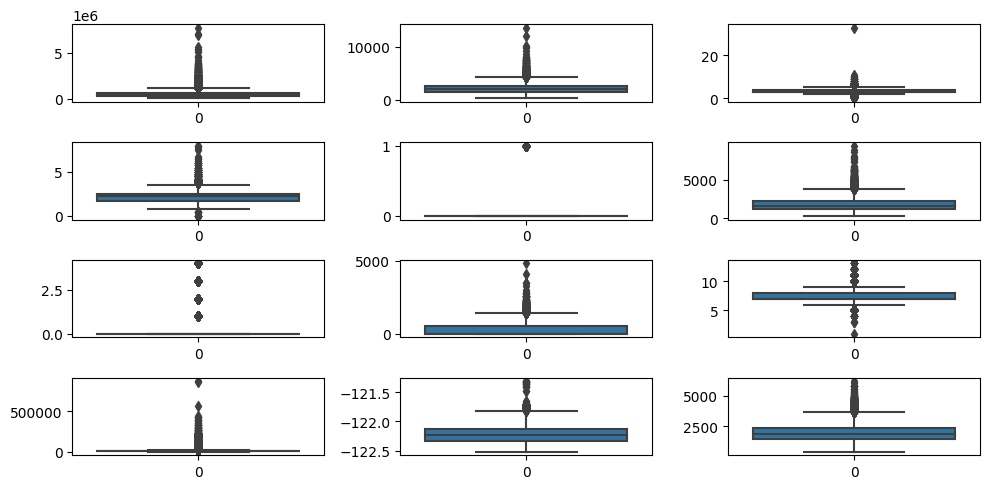

In [163]:
fig, axs = plt.subplots(4,3, figsize = (10,5))
plt1 = sns.boxplot(house_pred['price'], ax = axs[0,0])
plt2 = sns.boxplot(house_pred['sqft_living'], ax = axs[0,1])
plt3 = sns.boxplot(house_pred['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(house_pred['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(house_pred['waterfront'], ax = axs[1,1])
plt3 = sns.boxplot(house_pred['sqft_above'], ax = axs[1,2])
plt1 = sns.boxplot(house_pred['view'], ax = axs[2,0])
plt2 = sns.boxplot(house_pred['sqft_basement'], ax = axs[2,1])
plt3 = sns.boxplot(house_pred['grade'], ax = axs[2,2])
plt1 = sns.boxplot(house_pred['sqft_lot15'], ax = axs[3,0])
plt2 = sns.boxplot(house_pred['long'], ax = axs[3,1])
plt3 = sns.boxplot(house_pred['sqft_living15'], ax = axs[3,2])

plt.tight_layout()

# Handling Outliers

In [164]:
Q1 = house_pred.price.quantile(0.25)
Q3 = house_pred.price.quantile(0.75)
IQR = Q3 - Q1
house_pred = house_pred[(house_pred.price >= Q1 - 1.5*IQR) & (house_pred.price <= Q3 + 1.5*IQR)]

Q1 = house_pred.sqft_living.quantile(0.25)
Q3 = house_pred.sqft_living.quantile(0.75)
IQR = Q3 - Q1
house_pred = house_pred[(house_pred.sqft_living >= Q1 - 1.5*IQR) & (house_pred.sqft_living <= Q3 + 1.5*IQR)]

Q1 = house_pred.sqft_lot15.quantile(0.25)
Q3 = house_pred.sqft_lot15.quantile(0.75)
IQR = Q3 - Q1
house_pred = house_pred[(house_pred.sqft_lot15 >= Q1 - 1.5*IQR) & (house_pred.sqft_lot15 <= Q3 + 1.5*IQR)]

Q1 = house_pred.bedrooms.quantile(0.25)
Q3 = house_pred.bedrooms.quantile(0.75)
IQR = Q3 - Q1
house_pred = house_pred[(house_pred.bedrooms >= Q1 - 1.5*IQR) & (house_pred.bedrooms <= Q3 + 1.5*IQR)]

Q1 = house_pred.bathrooms.quantile(0.25)
Q3 = house_pred.bathrooms.quantile(0.75)
IQR = Q3 - Q1
house_pred = house_pred[(house_pred.bathrooms >= Q1 - 1.5*IQR) & (house_pred.bathrooms <= Q3 + 1.5*IQR)]

Q1 = house_pred.sqft_above.quantile(0.25)
Q3 = house_pred.sqft_above.quantile(0.75)
IQR = Q3 - Q1
house_pred = house_pred[(house_pred.sqft_above >= Q1 - 1.5*IQR) & (house_pred.sqft_above <= Q3 + 1.5*IQR)]

Q1 = house_pred.sqft_basement.quantile(0.25)
Q3 = house_pred.sqft_basement.quantile(0.75)
IQR = Q3 - Q1
house_pred = house_pred[(house_pred.sqft_basement >= Q1 - 1.5*IQR) & (house_pred.sqft_basement <= Q3 + 1.5*IQR)]

Q1 = house_pred.sqft_living15.quantile(0.25)
Q3 = house_pred.sqft_living15.quantile(0.75)
IQR = Q3 - Q1
house_pred = house_pred[(house_pred.sqft_living15 >= Q1 - 1.5*IQR) & (house_pred.sqft_living15 <= Q3 + 1.5*IQR)]

Q1 = house_pred.long.quantile(0.25)
Q3 = house_pred.long.quantile(0.75)
IQR = Q3 - Q1
house_pred = house_pred[(house_pred.long >= Q1 - 1.5*IQR) & (house_pred.long <= Q3 + 1.5*IQR)]

Q1 = house_pred.grade.quantile(0.25)
Q3 = house_pred.grade.quantile(0.75)
IQR = Q3 - Q1
house_pred = house_pred[(house_pred.grade >= Q1 - 1.5*IQR) & (house_pred.grade <= Q3 + 1.5*IQR)]

# After Outlier Handling Analysis

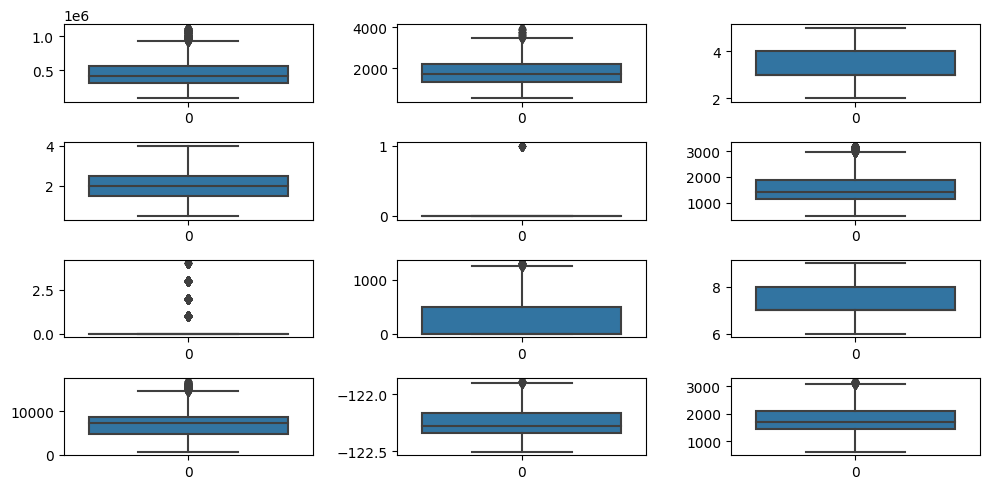

In [165]:
fig, axs = plt.subplots(4,3, figsize = (10,5))
plt1 = sns.boxplot(house_pred['price'], ax = axs[0,0])
plt2 = sns.boxplot(house_pred['sqft_living'], ax = axs[0,1])
plt3 = sns.boxplot(house_pred['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(house_pred['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(house_pred['waterfront'], ax = axs[1,1])
plt3 = sns.boxplot(house_pred['sqft_above'], ax = axs[1,2])
plt1 = sns.boxplot(house_pred['view'], ax = axs[2,0])
plt2 = sns.boxplot(house_pred['sqft_basement'], ax = axs[2,1])
plt3 = sns.boxplot(house_pred['grade'], ax = axs[2,2])
plt1 = sns.boxplot(house_pred['sqft_lot15'], ax = axs[3,0])
plt2 = sns.boxplot(house_pred['long'], ax = axs[3,1])
plt3 = sns.boxplot(house_pred['sqft_living15'], ax = axs[3,2])



plt.tight_layout()

<AxesSubplot:>

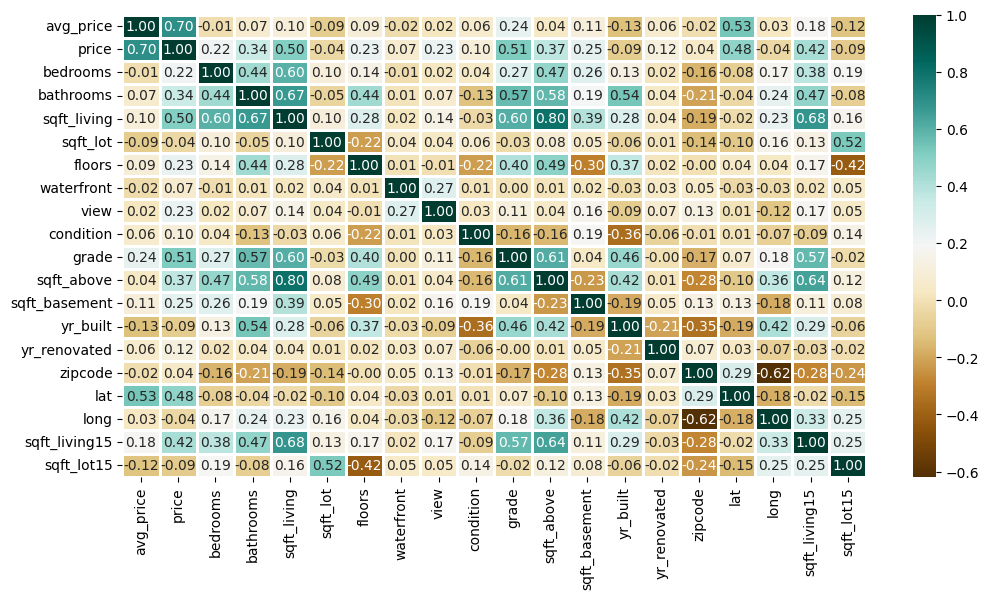

In [166]:
plt.figure(figsize=(12, 6))
sns.heatmap(house_pred.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)


In [167]:
house_pred.head()

,avg_price,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,310612.7557,221900,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,469455.7707,538000,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,462480.0353,180000,2,1.00,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,551688.6730,604000,4,3.00,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,685605.7755,510000,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Coorelation Analysis

c:\Users\rhyth\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\rhyth\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\rhyth\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\rhyth\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\rhyth\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigne

<Figure size 1000x800 with 0 Axes>

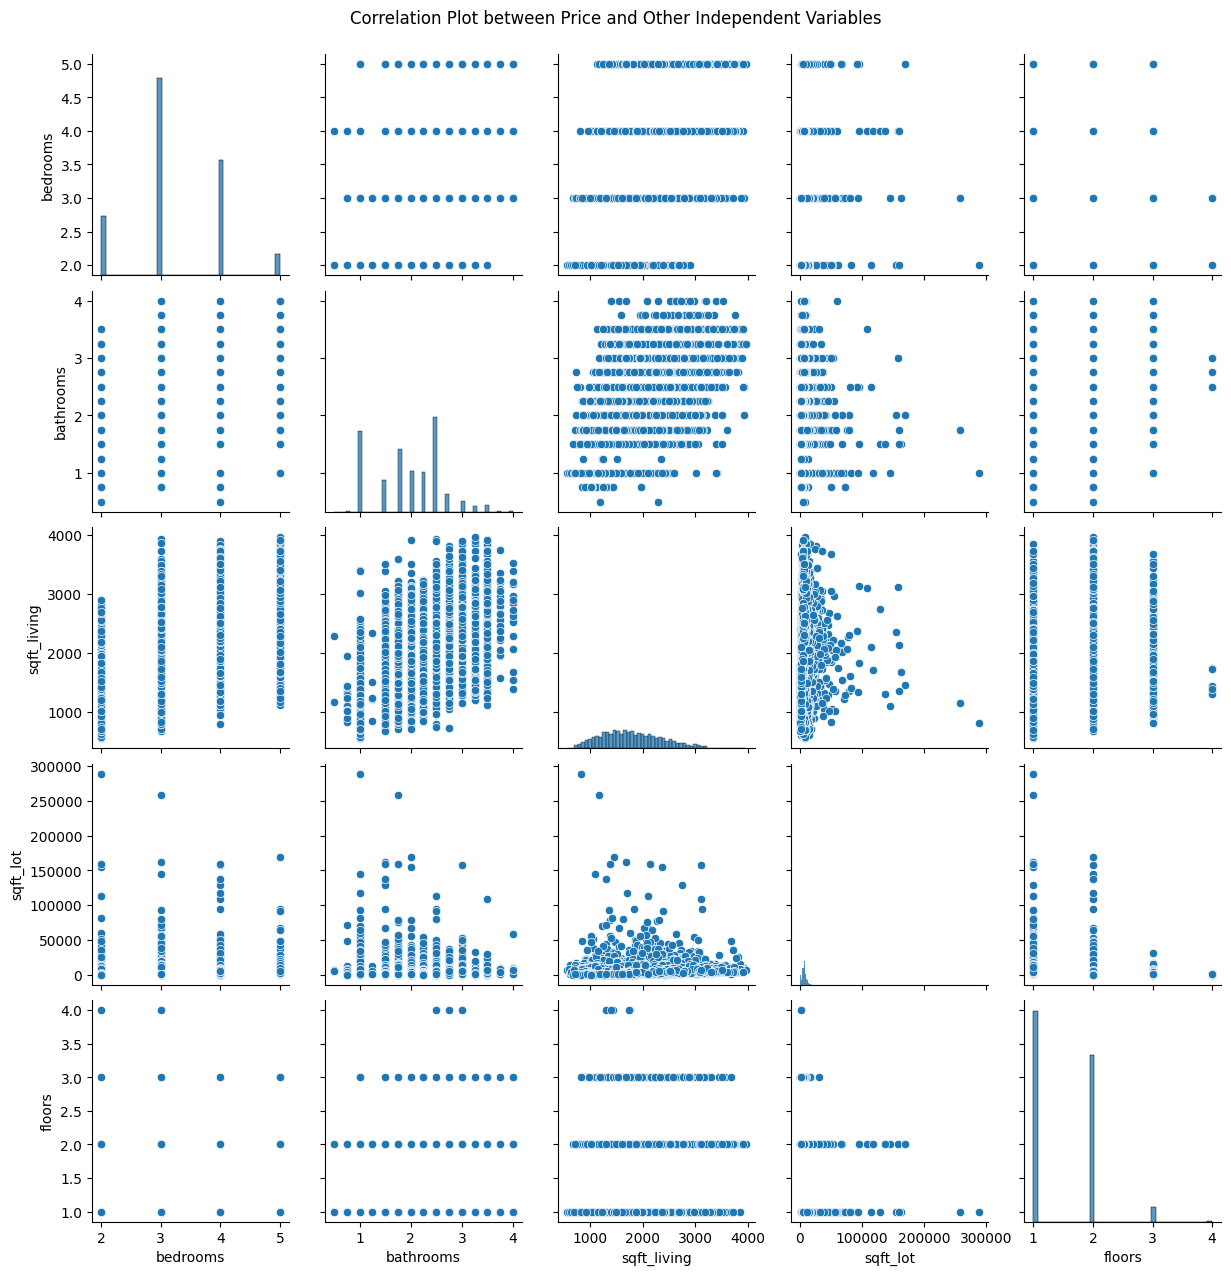

In [168]:
plt.figure(figsize=(10, 8))
sns.pairplot(house_pred.iloc[:, [2, 3, 4, 5, 6]], palette='darkgreen')
plt.suptitle('Correlation Plot between Price and Other Independent Variables', y=1.02)
plt.show()

# Spliting dataset into train test set and scaling the features

In [169]:

housing_tr, housing_ts = train_test_split(house_pred, train_size = 0.7, test_size = 0.3)

scaler = MinMaxScaler()
num_vars = ['price', 'sqft_living', 'sqft_above','view', 'sqft_basement', 'sqft_lot15', 'sqft_living15']
min_scaled = housing_ts['price'].min()
max_scaled = housing_ts['price'].max()
housing_tr[num_vars] = scaler.fit_transform(housing_tr[num_vars])
housing_ts[num_vars] = scaler.fit_transform(housing_ts[num_vars])

x_train=housing_tr.drop("price",axis=1)
y_train=housing_tr["price"].copy()
x_test=housing_ts.drop("price",axis=1)
y_test=housing_ts["price"].copy()

In [170]:
def model (model_name):
    if model_name == "decisionTree":
        from sklearn.tree import DecisionTreeRegressor
        classifier = DecisionTreeRegressor()
    elif model_name == "linear":
        from sklearn.linear_model import LinearRegression
        classifier = LinearRegression()
    elif model_name == "xgboost":
        import xgboost as xgb
        classifier = xgb.XGBRegressor(objective="reg:squarederror")
    elif model_name == "random":
        from sklearn.ensemble import RandomForestRegressor
        classifier = RandomForestRegressor(n_estimators=10)
    elif model_name == "catBoost":
        from catboost import CatBoostRegressor
        classifier = CatBoostRegressor()
    elif model_name == "svm":
        from sklearn import svm
        classifier = svm.SVR()
    else:
        raise RuntimeError("Model name incorrect.")
    return classifier

# Desired Model Name

In [171]:
model_name = 'catBoost' # Model Name: decisionTree, linear, xgboost, random, catBoost, svm

# Implementing Model

In [172]:
classifier = model(model_name) 
classifier.fit(x_train, y_train)
Y_pred_test = classifier.predict(x_test)
Y_pred_train = classifier.predict(x_train)
Y_pred_test

Learning rate set to 0.060051
0:	learn: 0.1719050	total: 19.8ms	remaining: 19.8s
1:	learn: 0.1655074	total: 22.3ms	remaining: 11.1s
2:	learn: 0.1589791	total: 24.6ms	remaining: 8.16s
3:	learn: 0.1529725	total: 26.9ms	remaining: 6.7s
4:	learn: 0.1476089	total: 29.2ms	remaining: 5.82s
5:	learn: 0.1424080	total: 32.4ms	remaining: 5.37s
6:	learn: 0.1373690	total: 35.2ms	remaining: 4.99s
7:	learn: 0.1330354	total: 37.6ms	remaining: 4.66s
8:	learn: 0.1287930	total: 40ms	remaining: 4.41s
9:	learn: 0.1249853	total: 42.6ms	remaining: 4.22s
10:	learn: 0.1215038	total: 45.2ms	remaining: 4.06s
11:	learn: 0.1182239	total: 48.3ms	remaining: 3.98s
12:	learn: 0.1151099	total: 51ms	remaining: 3.87s
13:	learn: 0.1122981	total: 53.3ms	remaining: 3.75s
14:	learn: 0.1095980	total: 55.6ms	remaining: 3.65s
15:	learn: 0.1070876	total: 59.7ms	remaining: 3.67s
16:	learn: 0.1046022	total: 63.8ms	remaining: 3.69s
17:	learn: 0.1025172	total: 67.9ms	remaining: 3.7s
18:	learn: 0.1003601	total: 71.7ms	remaining: 3.7s

array([0.38806876, 0.57488039, 0.27120729, ..., 0.24539837, 0.25593761,
       0.71638259])

# Quantitative Analysis

In [173]:
#Calculate Training Error
mse_train = mean_squared_error(y_train, Y_pred_train)
training_error=np.sqrt(mse_train)
r2Score_tr = r2_score(y_train, Y_pred_train)
MAE_tr = mean_absolute_error(y_train, Y_pred_train)
print('Training Error')
print('MSE: ', training_error, 'R2 Score: ', r2Score_tr, 'Mean Absoute Error: ', MAE_tr)

#Calculate Testing Error
mse_test = mean_squared_error(y_test, Y_pred_test)
testing_error = np.sqrt(mse_test)
r2Score = r2_score(y_test, Y_pred_test)
MAE = mean_absolute_error(y_test, Y_pred_test)
print('Testing Error')
print('MSE: ', testing_error, 'R2 Score: ', r2Score, 'Mean Absoute Error: ', MAE)

Training Error
MSE:  0.04601988382668063 R2 Score:  0.9337413948509832 Mean Absoute Error:  0.033627030239690936
Testing Error
MSE:  0.06403188559591354 R2 Score:  0.8732019841999719 Mean Absoute Error:  0.044895025949429235


In [174]:
house_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16132 entries, 0 to 21547
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   avg_price      16132 non-null  float64
 1   price          16132 non-null  int32  
 2   bedrooms       16132 non-null  int64  
 3   bathrooms      16132 non-null  float64
 4   sqft_living    16132 non-null  int64  
 5   sqft_lot       16132 non-null  int64  
 6   floors         16132 non-null  int64  
 7   waterfront     16132 non-null  int64  
 8   view           16132 non-null  int64  
 9   condition      16132 non-null  int64  
 10  grade          16132 non-null  int64  
 11  sqft_above     16132 non-null  int64  
 12  sqft_basement  16132 non-null  int64  
 13  yr_built       16132 non-null  int64  
 14  yr_renovated   16132 non-null  int64  
 15  zipcode        16132 non-null  int64  
 16  lat            16132 non-null  float64
 17  long           16132 non-null  float64
 18  sqft_l

In [186]:
input = np.array([[1194230.021,	7129300520,	'20141013T000000',-50,-28,-47,-10,-41,0,2,3,-19,-14,2,1,0,9,4,1,4,2 ]])
#input = np.array([[1194230.021,	7129300520,	'20141013T000000',-500,-280,-470,-10,-41,0,2,3,-19,-14,2,1,0,9,4,1,4,2 ]])
remove_col = [1, 2]
new_input = np.delete(input, remove_col)
pred = classifier.predict(new_input)
pred

0.35785635880383765

In [184]:
Final_output = pred * min_scaled + (max_scaled - min_scaled)
Final_output

1068289.9924184508